# Индивидуальная работа по криптоанализу

## Подгрузка модулей

In [185]:
! pip install beautifulsoup4 requests pandas seaborn matplotlib

## Загрузка частотных словарей

Задание алфавит как константы (пригодится на будущее для визуализации)

In [186]:
ALPHABET = "абвгдеёжзийклмнопрстуфхцчшщъыьэюя"

### Чтение частного словаря русского языка 

Словарь считывается с [сайта НКРЯ](http://dict.ruslang.ru/freq.php?act=show&dic=freq_letters).
Для парсинга html используется модуль BeautifulSoup

In [187]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Прочитать GET-запросом и вытянуть табличку
response = requests.get("http://dict.ruslang.ru/freq.php?act=show&dic=freq_letters&title=%D7%E0%F1%F2%EE%F2%ED%EE%F1%F2%FC%20%E1%F3%EA%E2%20%F0%F3%F1%F1%EA%EE%E3%EE%20%E0%EB%F4%E0%E2%E8%F2%E0")
soup = BeautifulSoup(response.text, "html.parser").find_all("table")[1]
rows = soup.find_all('tr')
list_rows = []

# Пробег по табличке и преобразование каждой строки в список
for row in rows:
    row_td = row.find_all('td')[1:]
    str_cells = list(map(str, row_td))
    clean_text = list(map(lambda x: BeautifulSoup(x,"html.parser").get_text().strip(), str_cells))
    list_rows.append(clean_text)

# Фронтендер сайтя НКРЯ сделал между заголовком и текстом пустую строку >:(
# Вырезаем её
list_rows = list_rows[0:1] + list_rows[2:]

# Перегонка в пандас датафрейм (можно было обойтись без этого, но вытянуть столбец из датафрейма проще)
df = pd.DataFrame(list_rows)
headers = df.iloc[0]
new_df  = pd.DataFrame(df.values[1:], columns=headers).drop(columns=[None, 'Ранг'])

# Пересчёт относительной частоты из абсолютной
valid_freq = np.array(list(map(int, list(new_df['Абс. частота']))), dtype="float64")
valid_freq /= np.sum(valid_freq)

### Создание частотного словаря для входного текста

In [188]:
input_str = '''звамйзгзажжся сдрцря йзбизжрдс ёжа кзёзт г оадафзжу жргоз жа йзкхзкрд жз эоз аща жр з чаё жа нзизлрдз я ёзндс гукс унзкжз иытор с кзёлсвзожрцы жа выдз кзёс йзэозёу сдрцря йзбизжрдс аща лсб йзбкжз иачалзё р убжсдс зо кзёлсвзожрцы чоз ёажя жао кзёлсвзожрцс жа иркадс ёажя м измгламажья и ёзат гзёжсоа жзлёсдьжыт вамйзлякзг
жс мдакующрт кажь уеа жа жс шуогу звамйзгзажжся сдрцря м уолс ирмадс жс оадафзжа ёажя жрнка жа выдз кзёзт жс жзчь я жа избилсщсдсмь жргоз жрчанз жа бжсд звз ёжа лсммйлзмы сдрцрр зчажь имолаизердр сжроу м гзозлзт я кзнзизлрдсмь имолаороьмя из иозлжрг жз жа йлршдс р жа йзксисдс жргсгрх иамоат с иакь сжрос йалаизкрдс ёзю гжрегу и чаё я выдс бсржоаламзисжс гукс вздьша аа иамь иачал зжс выдс иыжуекажс йалаизкроь зкжс бдрдсмь жсбисжрисдс ёжа с ёажя има жа выдз р жа выдз
има эоз бсмосирдз сдрцрю бскуёсоьмя йзкуёси зжс иачалзё и чаоиалн йзмда лсвзоы йлршдс гз ёжа кзёзт йзнзизлри м кзёлсвзожрцат зжс змёзоладс гислорлу йлзиалрдс жсдрчра ёзрх иащат йлзчдс изйлагр мизрё йлржцрйсё бсйлсидажжза и йршущую ёсшржгу ёза йрмьёз г ёрхсду хзоя эоз ат жрчанз жа ксдз рвз йрмьёз мзмозядз и змжзижзё рб лсммуекажрт жс оаёу гсгзиы шсжмы фдзлажм жс йзваку и зчалакжых мгсчгсх йзозё жсйрдсмь гзфа йзмркадс бс моздзё р жрчанз жа лашрдс гсгзажрвукь дювзижза йлргдючажра жа йзхзеа жс ёажя уе мгзлаа ёзежз йлакйздзероь чоз ёжа зчалакжзт лсб чозоз иоаёяшрдзмь и нздзиу р я лашрдс жаёакдажжз ахсоь и йздьшу йлрчаё ахсоь и чаё выдс  всб иащат ваб кажан ваб кзгуёажози гзозлыа даесдр и мозда р млакр гзозлых жа хисосдз оздьгз йсмйзлос сдрцря звбизжрдс има вздьжрцы бизжрдс и йздрцрю р йзеслжую гзёсжку жргоз звз ёжа жрчанз жа бжсд я гсг мгизбь баёдю йлзисдрдсмь
'''

# Удаление пробелов из строчки
input_str_processed = input_str.replace(' ', '')

# Пробежка по строке, подсчёт абсолютной частоты (индекс в этом массиве соответствует букве по порядку от а до я)

freq = [0] * len(ALPHABET)
for j in input_str_processed:
  if ALPHABET.find(j) == -1:
    print(j)
  freq[ALPHABET.find(j)] += 1

# Пересчёт относительной частоты
freq = np.array(freq, dtype="float64")
freq /= np.sum(freq)

### Визуализация

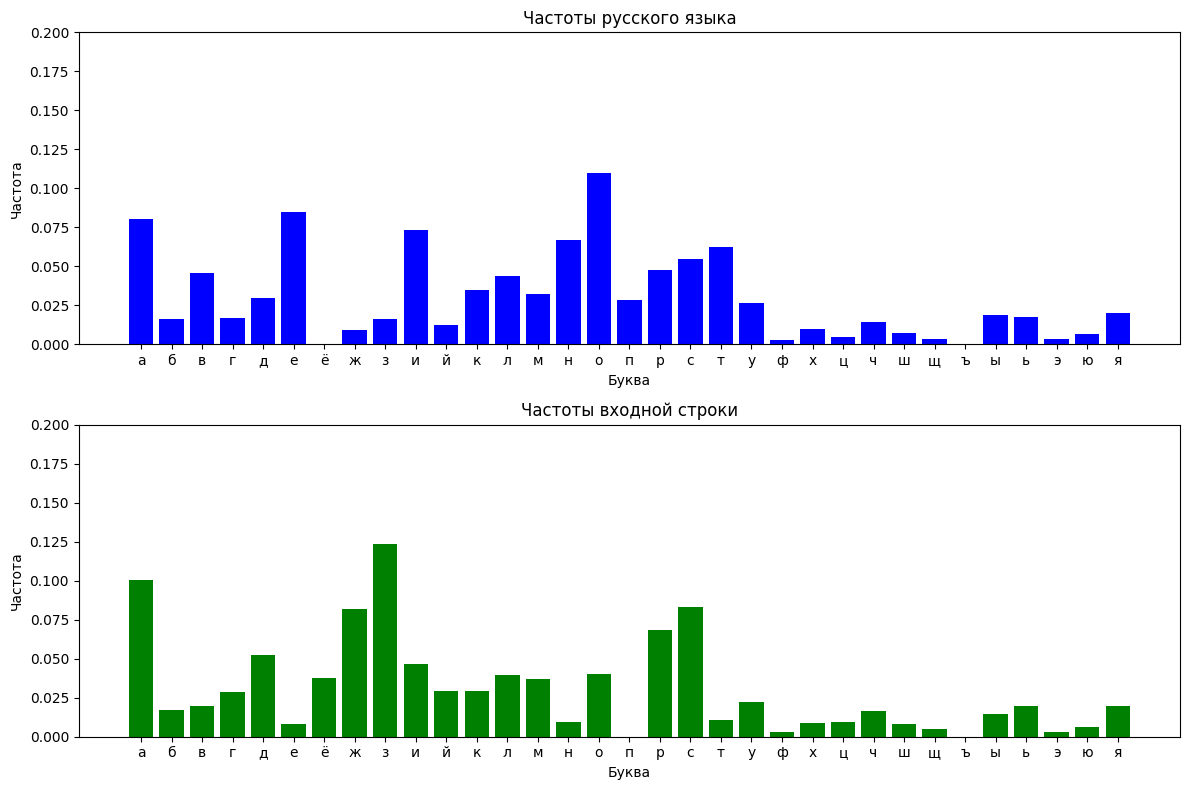

In [189]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.bar(list(ALPHABET), valid_freq, color='blue')
plt.title('Частоты русского языка')
plt.xlabel('Буква')
plt.ylabel('Частота')
plt.ylim(0, 0.2)

plt.subplot(2, 1, 2)
plt.bar(list(ALPHABET), freq, color='green')
plt.title('Частоты входной строки')
plt.xlabel('Буква')
plt.ylabel('Частота')
plt.ylim(0, 0.2)

plt.tight_layout()
plt.show()

## Процесс расшифровки

### Последовательность действий

Если неформально описывать, то выглядел процесс примерно так:

1. Добавил замену;
2. Поискал слова, напоминающие что-то осмысленное;
3. "Подогнал" замены для них;
4. Повторил, пока текст не расшифровался. 

В первых двух шагах я ещё ориентировался на изначальный, входной, зашифрованный текст. Потом уже смотрел сразу на
промежуточную расшифровку, поэтому в словах *могут возникать повторы* (где-то одна и та же буква появилась в результате замены,
а где-то буква уже была в изначальном слове). Яркий пример — шаг #7 ниже.

### Последовательность замен

Здесь конкретные строки и слова, которые я находил и "подгонял":

1. Сначала я увидел слова "аща" и "аа". По частоте "а", скорее всего, является какой-то гласной. Подходит только "е";
2. Я нашёл последовательность "аща жр з чаё жа" и посмотрел на первое слово в тексте - "звамйзгзажжся". "жж" повторено
дважды в конце, а в последовательности есть "жа", которое заменилось на "же". Кажется, "ж" можно попробовать заменить
на "н". По частоте сходится. Тогда фраза "аща жр з чаё жа" может подуматься как "еще ни о чем не";
3. Потом в "расшифровке" я нашёл "ниченз". "ничего", очевидно;
4. "го мне" -> "ко мне";
5. "йимьмо" -> "письмо";
6. "пишущую мсшинку" -> "пишущую машинку";
7. "сосооядо" -> "состояло";
8. "иосклесенья" -> "воскресенья";
9. "моет комнате" -> "моей комнате";
10. "равоты" -> "работы";
11. "побвонила мне комой" -> "позвонила мне домой";
12. "уее" -> "уже".

Ниже приведён код, которым я пользовался для того, чтобы сразу смотреть результаты расшифровки. Тождественные замены здесь исключены за ненадобностью:

In [190]:
replacement_dict = {
    # Шаг 1
    'а': 'е',
    # Шаг 2
    'ж': 'н',
    'р': 'и',
    'ё': 'м',
    # Шаг 3
    'н': 'г',
    'з': 'о',
    # Шаг 4
    'г': 'к',
    # Шаг 5
    'м': 'с',
    'й': 'п',
    # Шаг 6
    'с': 'а',
    # Шаг 7
    'о': 'т',
    'д': 'л',
    # Шаг 8
    'и': 'в',
    'л': 'р',
    # Шаг 9
    'т': 'й',
    # Шаг 10
    'в': 'б',
    # Шаг 11
    'б': 'з',
    'к': 'д',
    # Шаг 12
    'е': 'ж'
}

new_str = ''.join([replacement_dict[c] if c in replacement_dict else c for c in input_str])

#print(new_str)

## Итоговый текст

In [191]:
import textwrap
print(textwrap.fill(new_str))

обеспокоенная алиция позвонила мне домой к телефону никто не подходил
но это еще ни о чем не говорило я могла куда угодно выйти а
домработницы не было дома поэтому алиция позвонила еще раз поздно
вечером и узнала от домработницы что меня нет домработница не видела
меня с воскресенья в моей комнате нормальный беспорядок на следующий
день уже не на шутку обеспокоенная алиция с утра висела на телефоне
меня нигде не было домой на ночь я не возвращалась никто ничего не
знал обо мне расспросы алиции очень встревожили аниту с которой я
договорилась встретиться во вторник но не пришла и не подавала никаких
вестей а ведь анита переводила мою книжку в чем я была заинтересована
куда больше ее весь вечер она была вынуждена переводить одна злилась
названивала мне а меня все не было и не было все это заставило алицию
задуматься подумав она вечером в четверг после работы пришла ко мне
домой поговорив с домработницей она осмотрела квартиру проверила
наличие моих вещей прочла вопреки своим принципам за